# Heart Failure Prediction Machine Learning Model

## Data Dictionary

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: - showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

## Functions

In [5]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [6]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    data[feature].describe()
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [7]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [8]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Importing Libraries

In [10]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [12]:
df = pd.read_csv("heart.csv")

## Data Overview

In [14]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
855,68,M,NAP,180,274,1,LVH,150,Y,1.6,Flat,1
723,59,M,ASY,140,177,0,Normal,162,Y,0.0,Up,1
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
63,46,M,ASY,120,277,0,Normal,125,Y,1.0,Flat,1
838,63,M,ASY,130,330,1,LVH,132,Y,1.8,Up,1
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
899,61,M,ASY,148,203,0,Normal,161,N,0.0,Up,1
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
648,59,M,ASY,170,326,0,LVH,140,Y,3.4,Down,1
99,41,M,ATA,125,269,0,Normal,144,N,0.0,Up,0


In [15]:
df.shape

(918, 12)

918 Rows and 12 Columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [18]:
#checking the amount of unique values in each feature
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
#Looking at statistics of numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [21]:
# Looking at our target variable
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Observations

- Possible outliers in Cholesterol
- No null values
- No duplicated information
- Fasting BS and Heart Disease are already encoded
- Somewhat even distribution in target variable

#### Numeric Features
- Age 
- Resting BP
- Cholesterol
- MaxHR
- Oldpeak

#### Categorical Features
- Sex
- ChestPainType
- FastingBS
- RestingECG
- ExerciseAngina
- ST_Slope
- HeartDisease

### Handling outliers

#### Cholesterol

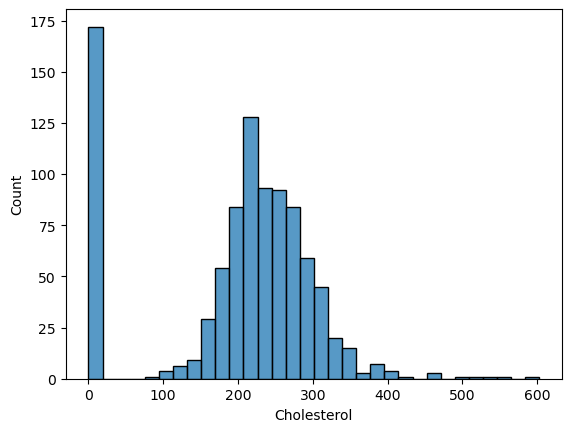

In [26]:
sns.histplot(df['Cholesterol']);

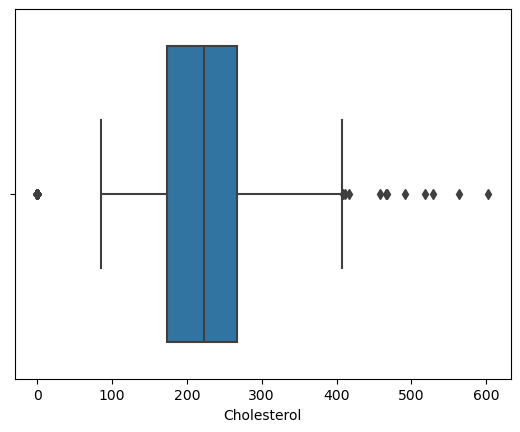

In [27]:
sns.boxplot(data=df, x='Cholesterol'); 

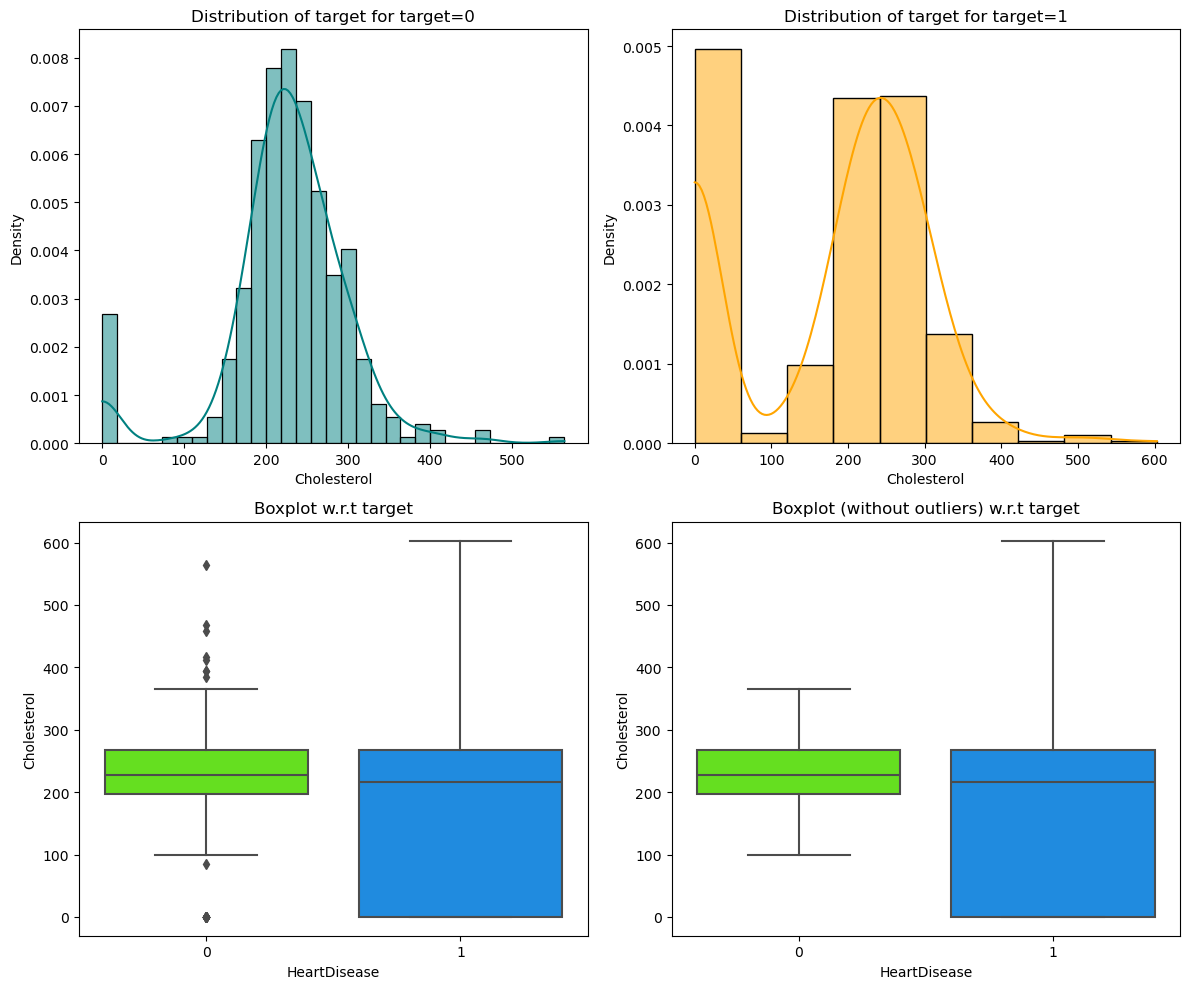

In [28]:
distribution_plot_wrt_target(df, 'Cholesterol', 'HeartDisease')

Leaving outliers as they seem to be useful in the dataset

## Exploratory Data analysis 

### Univariate Analysis

#### Numeric Features
- Age 
- Resting BP
- Cholesterol
- MaxHR
- Oldpeak

##### Age

In [33]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

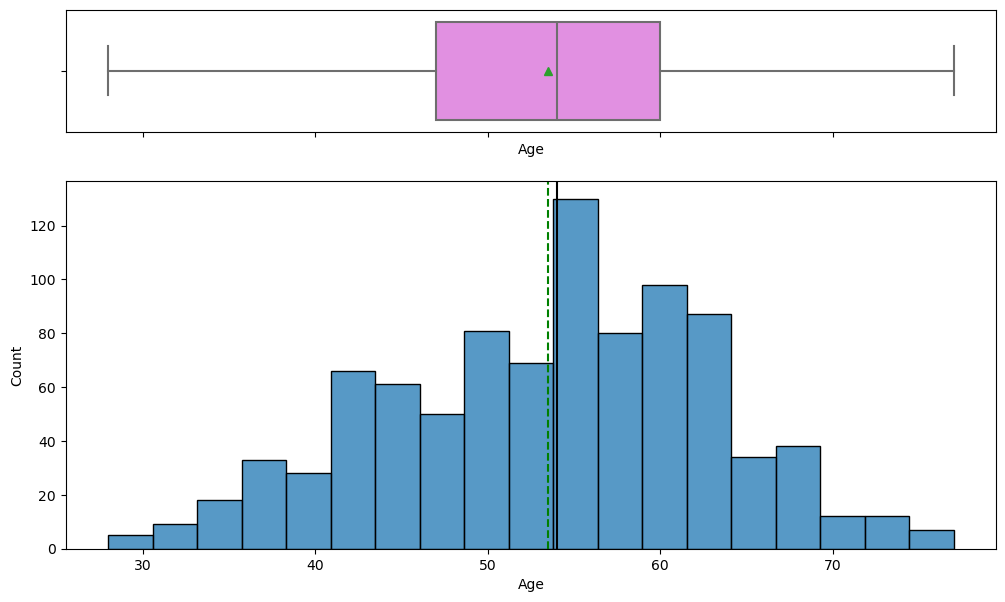

In [34]:
histogram_boxplot(df, 'Age');

##### RestingBP

In [36]:
df['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

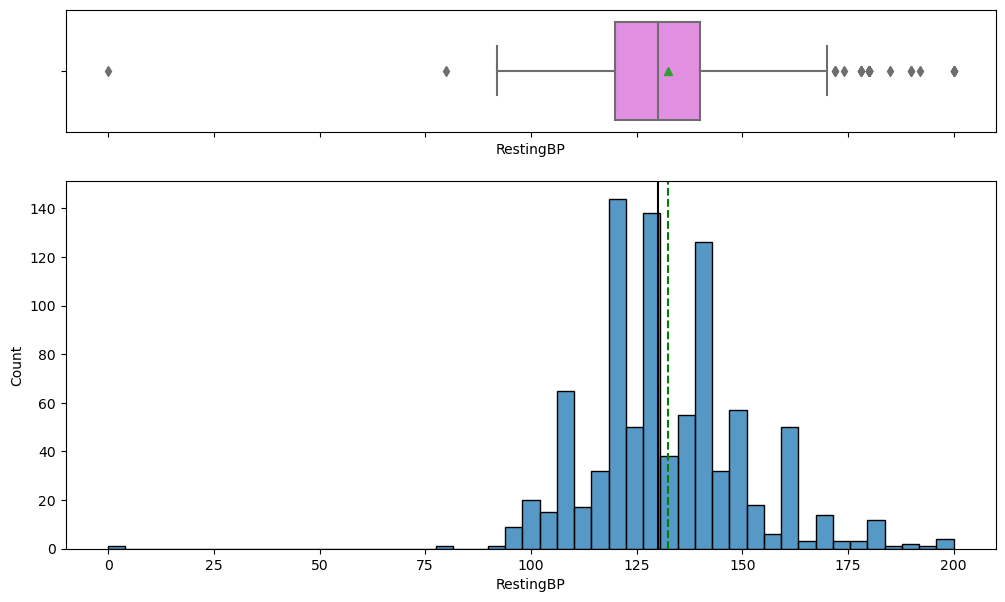

In [37]:
histogram_boxplot(df, 'RestingBP');

Possible Outliers to handle later

##### Cholesterol

In [40]:
df['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

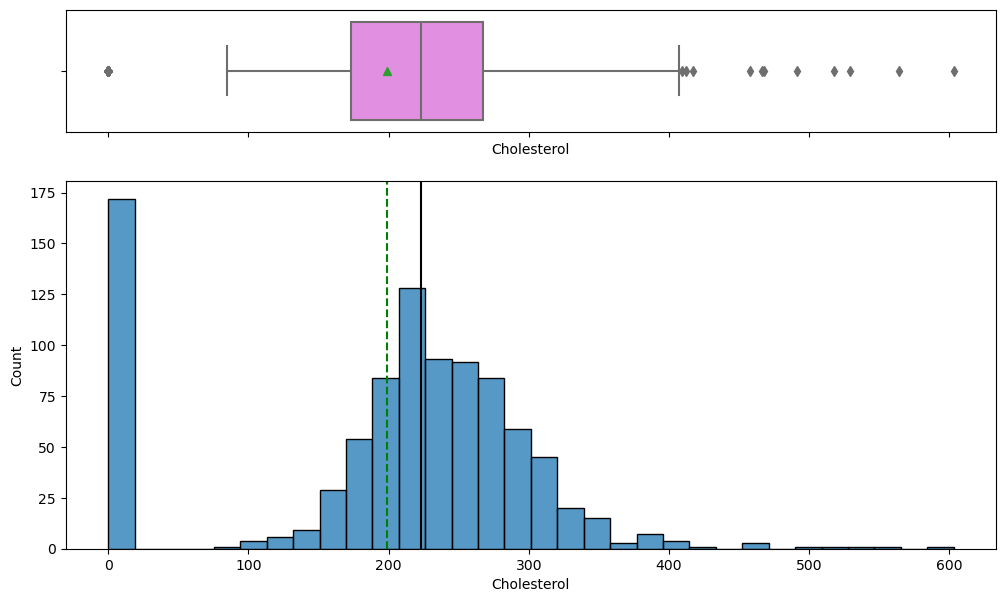

In [41]:
histogram_boxplot(df, 'Cholesterol');

Determined earlier outliers were useful

##### Max HR

In [44]:
df['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

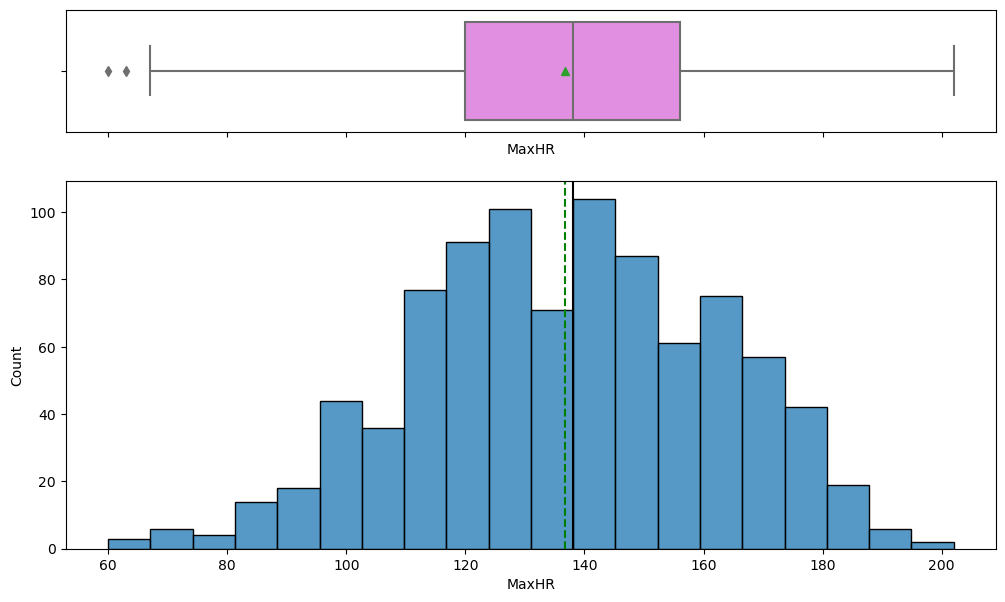

In [45]:
histogram_boxplot(df, 'MaxHR');

2 outliers might need to be adressed

##### OldPeak

In [48]:
df['Oldpeak'].describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

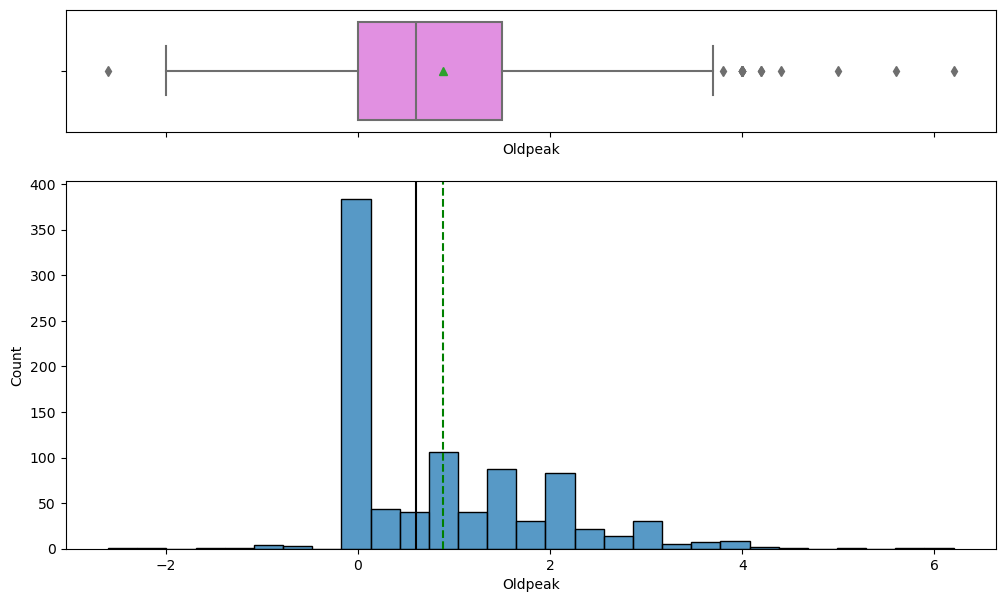

In [49]:
histogram_boxplot(df, 'Oldpeak');

Possible Outliers to handle

#### Categorical Features
- Sex
- ChestPainType
- FastingBS
- RestingECG
- ExerciseAngina
- ST_Slope
- HeartDisease

##### Sex

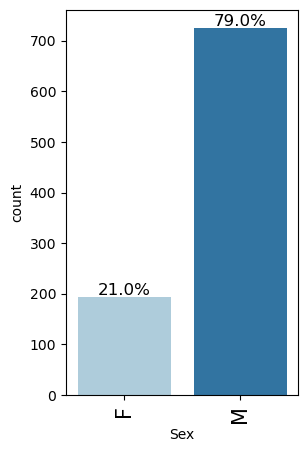

In [53]:
labeled_barplot(df, 'Sex', perc=True)

Skewed male dataset

##### Chest Pain Type

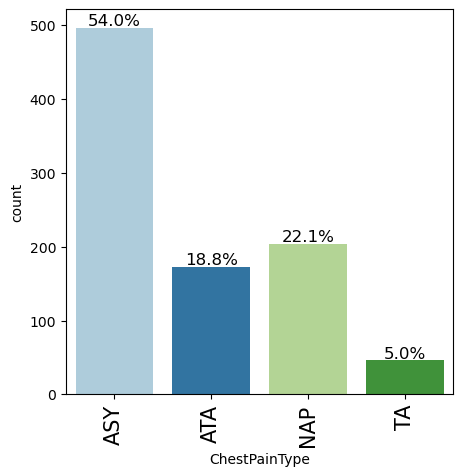

In [56]:
labeled_barplot(df, 'ChestPainType', perc=True)

ASY is the majority of the dataset

##### FastingBS

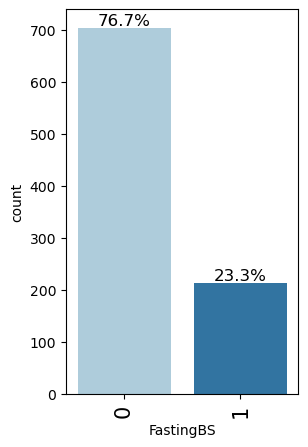

In [59]:
labeled_barplot(df, 'FastingBS', perc=True)

FastingBS less than 120 is majority

##### RestingECG

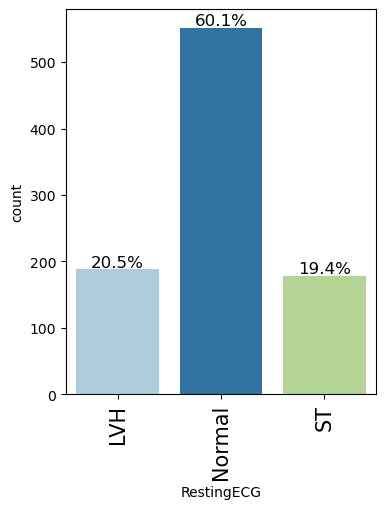

In [62]:
labeled_barplot(df, 'RestingECG', perc=True)

Normal is the majority

##### ExerciseAngina

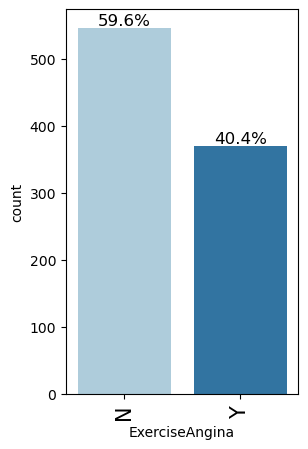

In [65]:
labeled_barplot(df, 'ExerciseAngina', perc=True)

N has a slight majority over Y

##### ST_SLope

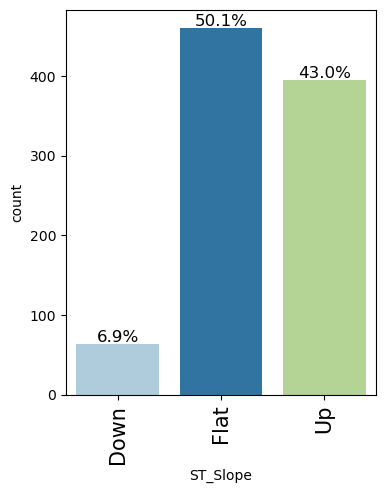

In [68]:
labeled_barplot(df, 'ST_Slope', perc=True)

Flat and Up hold the majority

##### HeartDisease

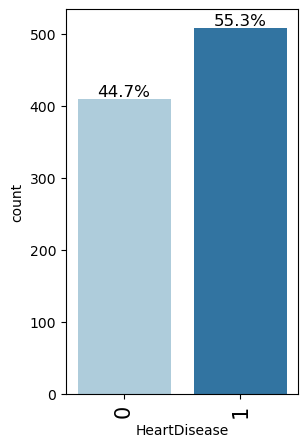

In [71]:
labeled_barplot(df, 'HeartDisease', perc=True)

Somewhat Even Distribution for people with and without heart disease

### Multi/Bivariate Analysis

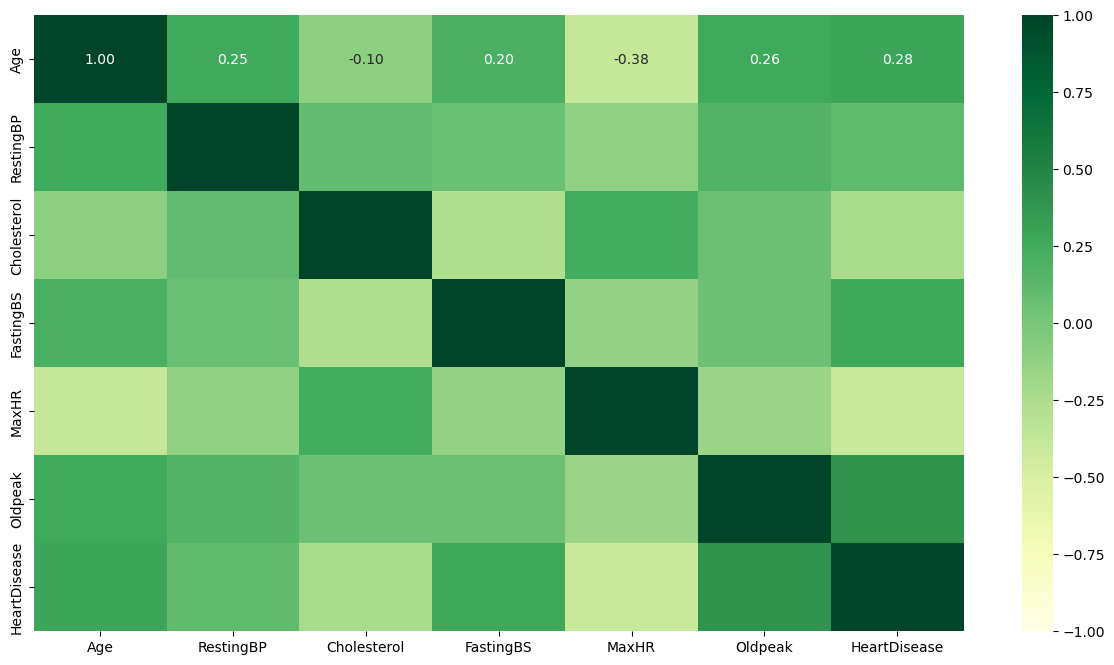

In [74]:
#### Corelation heat map
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="YlGn")
plt.show()

- Slighlty high positive correlation for old peak and heart disease
- Slightly high negative correlation for max hr and age
- Slightly high negative correlation for heart disease and max hr

#### Numeric Features
- Age 
- Resting BP
- Cholesterol
- MaxHR
- Oldpeak

##### Age

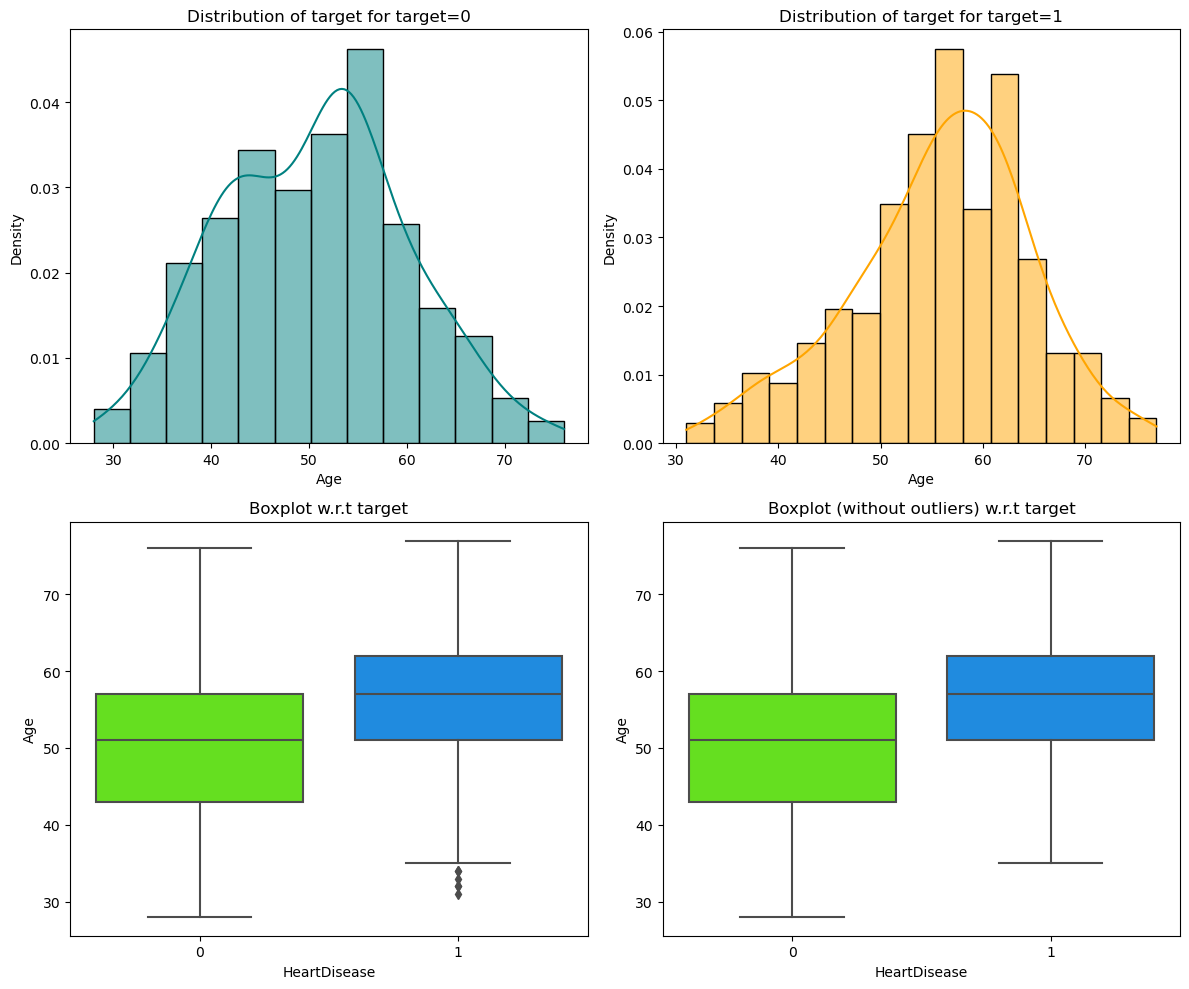

In [78]:
distribution_plot_wrt_target(df, 'Age', 'HeartDisease')

Slightly older for those with heart attacks

##### Resting BP

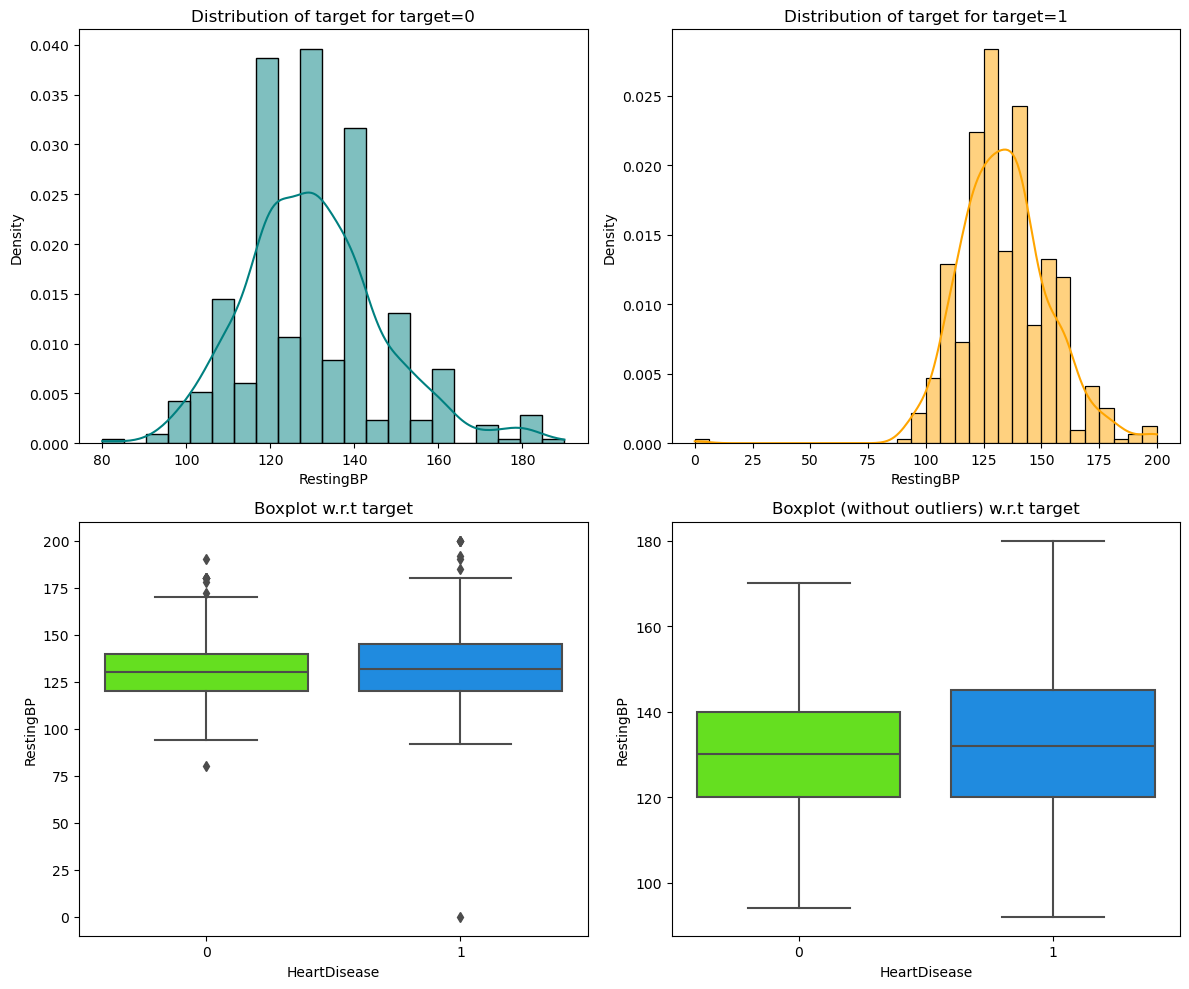

In [81]:
distribution_plot_wrt_target(df, 'RestingBP', 'HeartDisease')

Large Outlier for those with heart disease will handle

##### MaxHR

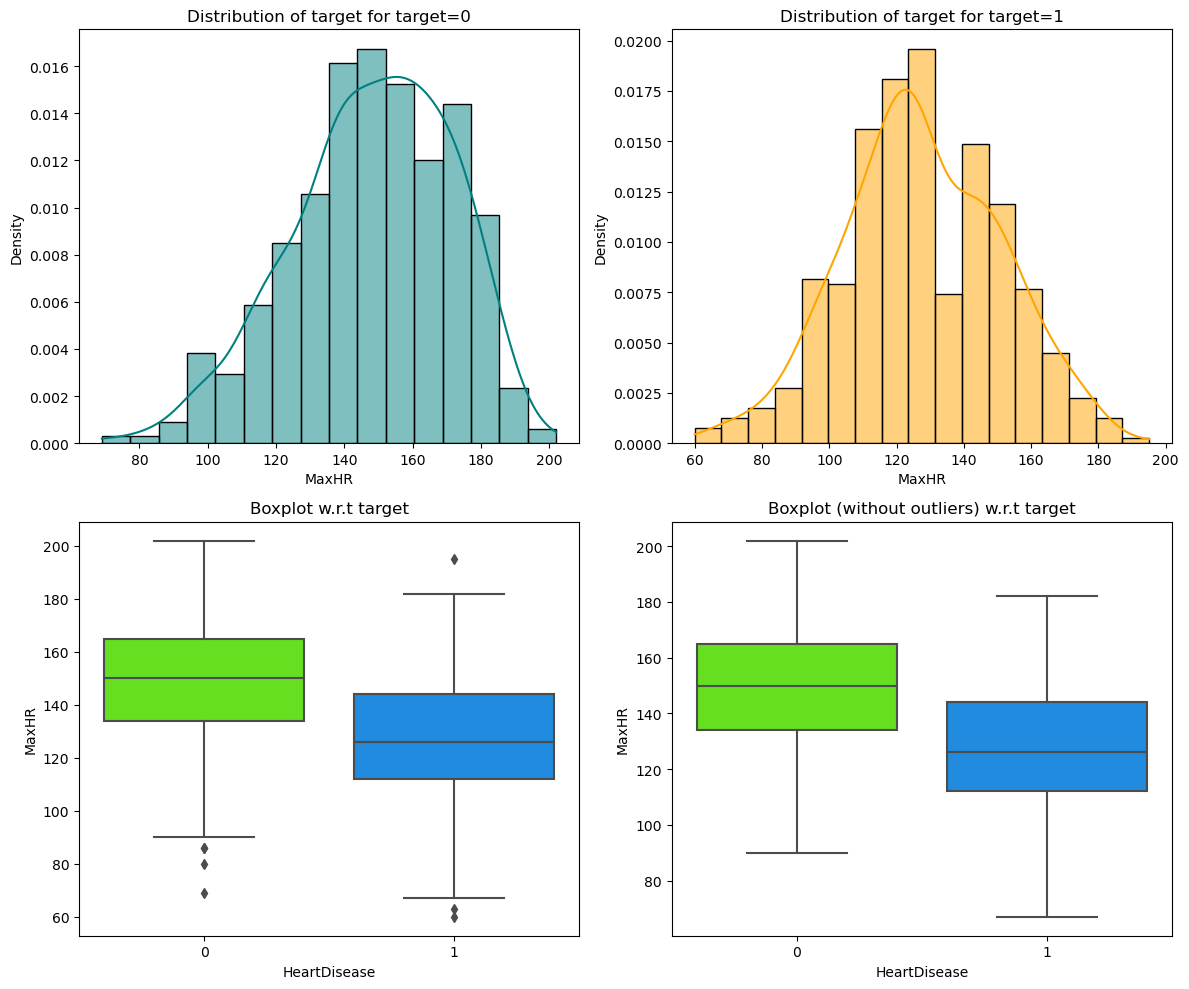

In [84]:
distribution_plot_wrt_target(df, 'MaxHR', 'HeartDisease')

Slight outliers and max HR is higher for those without HeartDisease

##### Cholesterol

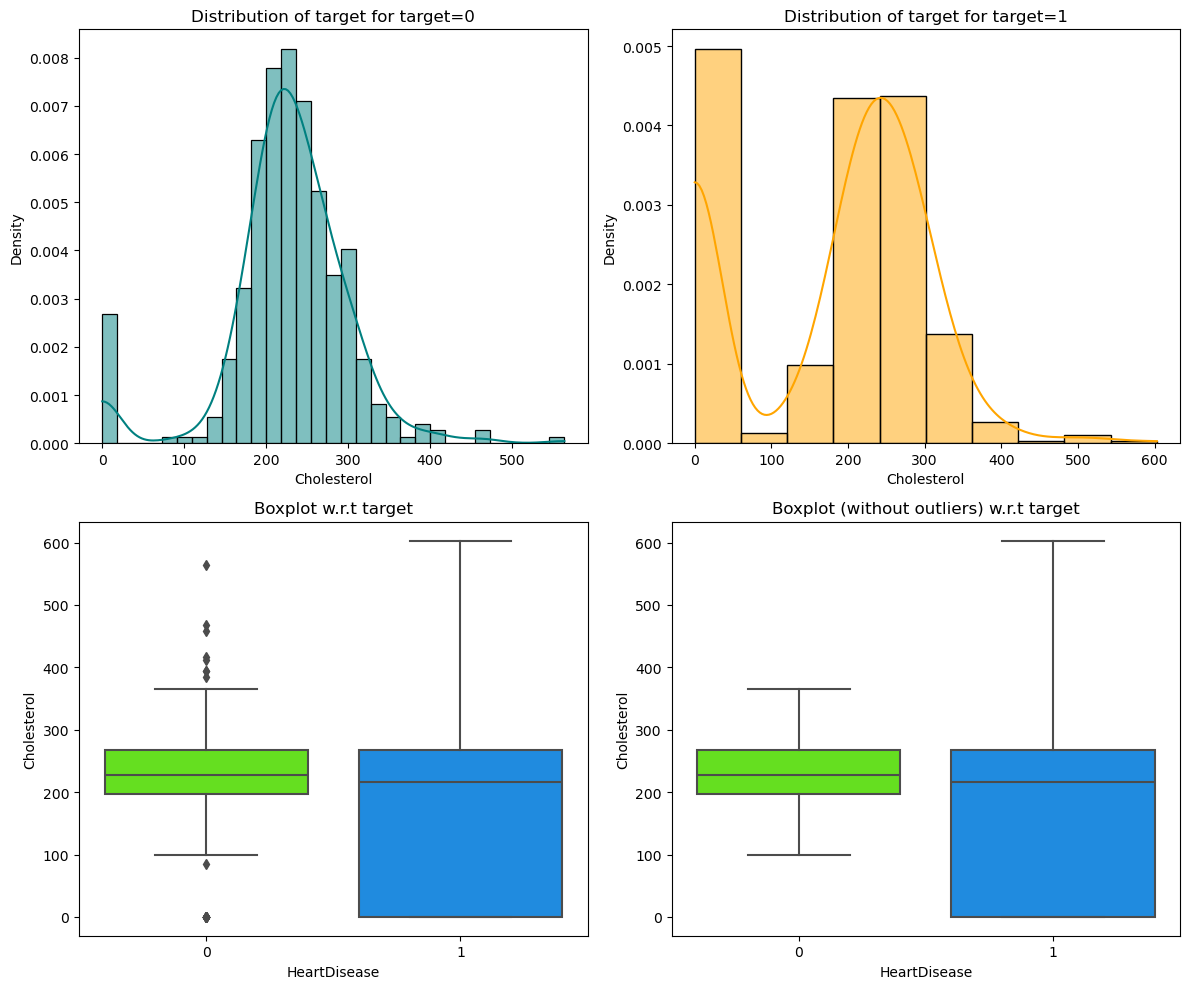

In [87]:
distribution_plot_wrt_target(df, 'Cholesterol', 'HeartDisease')

Those with Heart Disease have much lower concentration of cholesterol

In [89]:
df.Cholesterol.value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

Could 0 Cholesterol be a null value?

##### Oldpeak

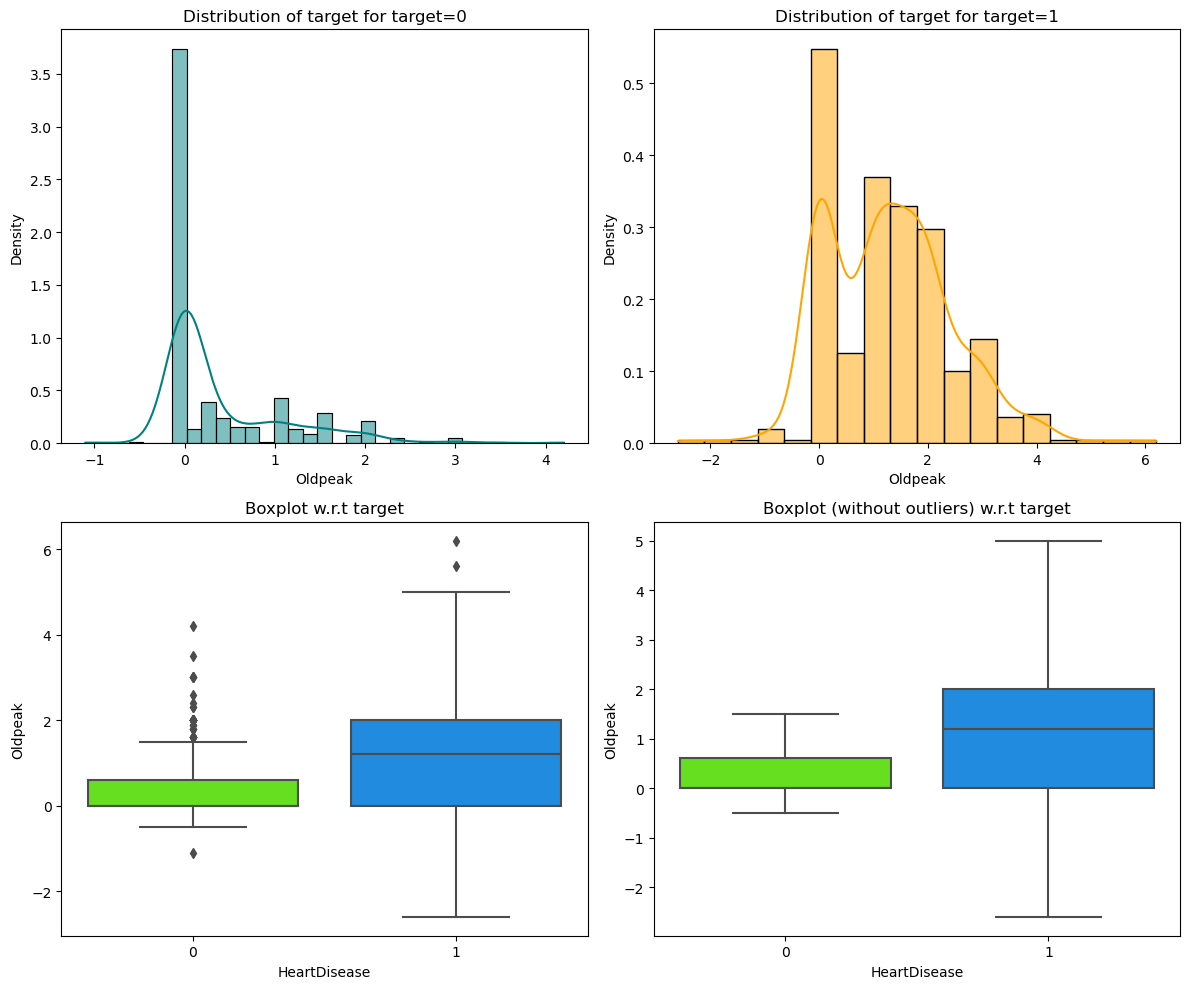

In [92]:
distribution_plot_wrt_target(df, 'Oldpeak', 'HeartDisease')

Wider range for those without heart disease

#### Categorical
- Sex
- ChestPainType
- FastingBS
- RestingECG
- ExerciseAngina
- ST_Slope
- HeartDisease

##### Sex

HeartDisease    0    1  All
Sex                        
All           410  508  918
M             267  458  725
F             143   50  193
------------------------------------------------------------------------------------------------------------------------


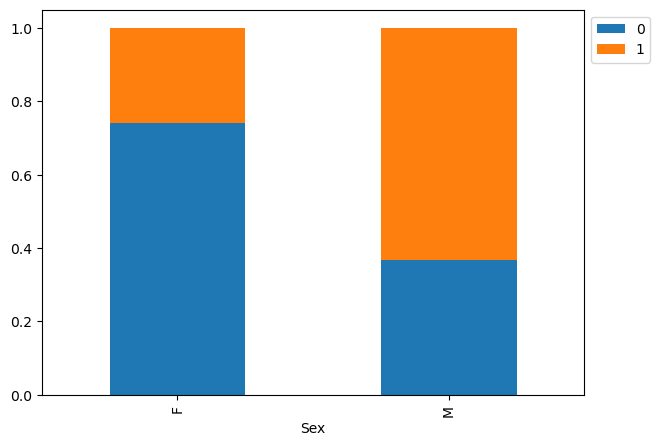

In [96]:
stacked_barplot(df, 'Sex', 'HeartDisease')

More males have heart disease could be due to data set

##### ChestPainType

HeartDisease     0    1  All
ChestPainType               
All            410  508  918
ATA            149   24  173
NAP            131   72  203
ASY            104  392  496
TA              26   20   46
------------------------------------------------------------------------------------------------------------------------


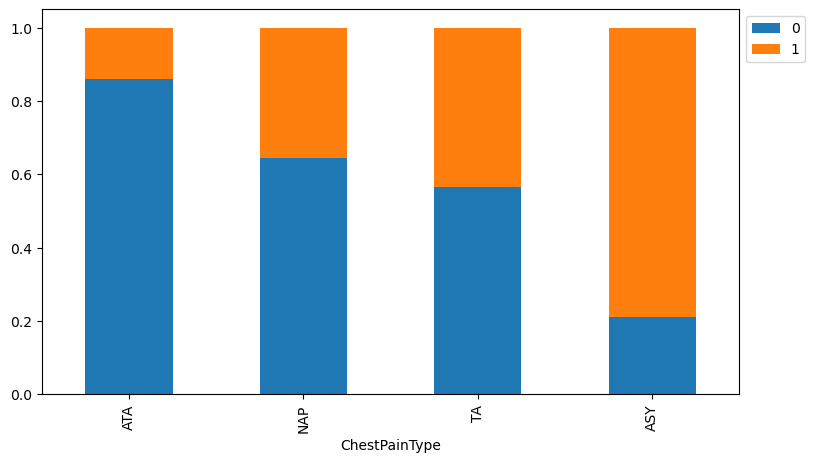

In [99]:
stacked_barplot(df, 'ChestPainType', 'HeartDisease')

Those with ASY chest pain are highly likely to have heart disease

##### FastingBS

HeartDisease    0    1  All
FastingBS                  
All           410  508  918
0             366  338  704
1              44  170  214
------------------------------------------------------------------------------------------------------------------------


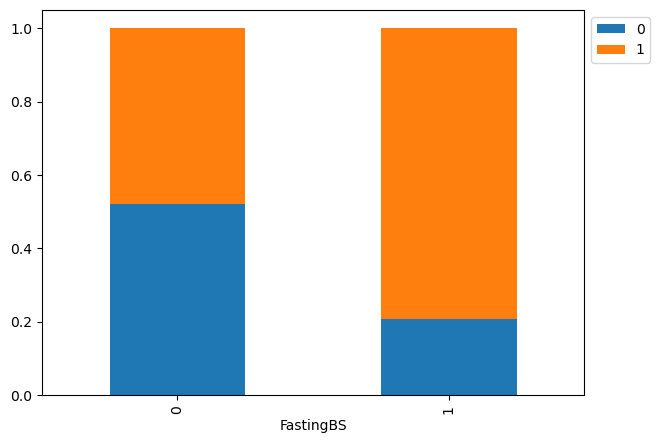

In [102]:
stacked_barplot(df, 'FastingBS', 'HeartDisease')

Slightly higher fasting BS for those with Heart Disease

##### RestingECG

HeartDisease    0    1  All
RestingECG                 
All           410  508  918
Normal        267  285  552
LVH            82  106  188
ST             61  117  178
------------------------------------------------------------------------------------------------------------------------


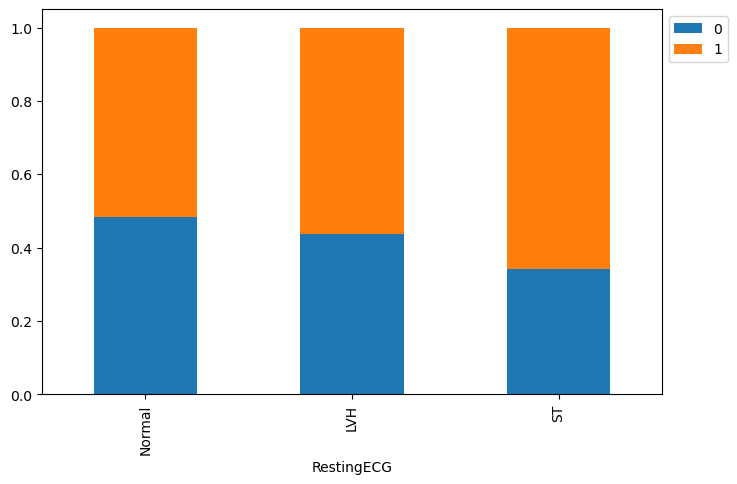

In [105]:
stacked_barplot(df, 'RestingECG', 'HeartDisease')

More with heart disease for ST and LVH not to far off from one another

##### Exercise Angina

HeartDisease      0    1  All
ExerciseAngina               
All             410  508  918
N               355  192  547
Y                55  316  371
------------------------------------------------------------------------------------------------------------------------


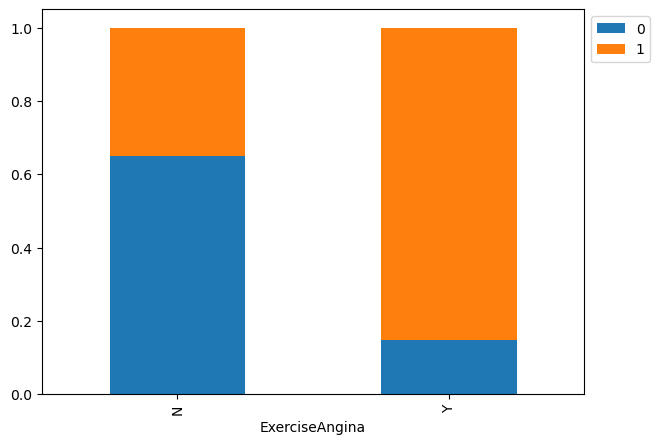

In [108]:
stacked_barplot(df, 'ExerciseAngina', 'HeartDisease')

Y has significantly higher with heart Disease

##### ST_Slope

HeartDisease    0    1  All
ST_Slope                   
All           410  508  918
Up            317   78  395
Flat           79  381  460
Down           14   49   63
------------------------------------------------------------------------------------------------------------------------


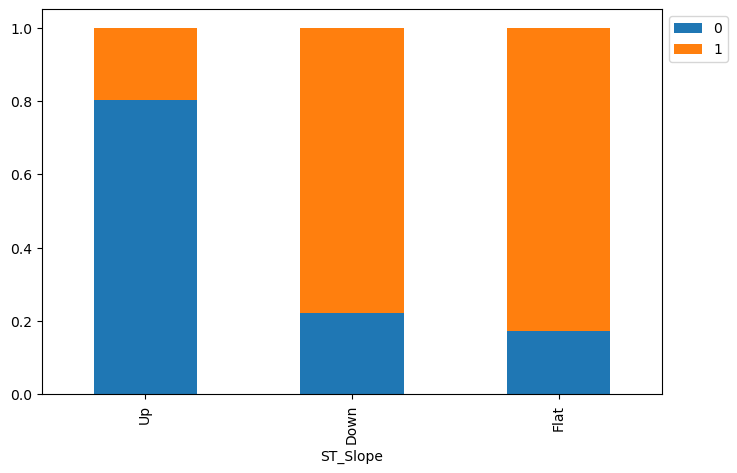

In [111]:
stacked_barplot(df, 'ST_Slope', 'HeartDisease')

Down and Flat are much more likley to have heart disease

#### Observations

- Cholestrol, MaxHR, Resting BP, Old Peak have outliers
- Down and Flat are much more likley to have heart disease
- Y has significantly higher with heart Disease
- More with heart disease for ST and LVH not to far off from one another
- Slightly older for those with heart attacks
- Slightly higher fasting BS for those with Heart Disease
- Those with ASY chest pain are highly likely to have heart disease
- More males have heart disease could be due to data set

## Feature Engineering/Final Dataset Cleanup

In [115]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Age

In [117]:
df.Age.describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [118]:
# Normalizing Age
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])

In [119]:
df.Age.describe()

count    918.000000
mean       0.520630
std        0.192502
min        0.000000
25%        0.387755
50%        0.530612
75%        0.653061
max        1.000000
Name: Age, dtype: float64

#### Sex

In [121]:
df.Sex.value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [122]:
# Label Encoding Sex
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

#### Chest Pain Type



In [124]:
df.ChestPainType.value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [125]:
# Label Encoding Chest Pain Type
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])

#### Resting BP

In [127]:
df.RestingBP.describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [128]:
# Normalizing Resting_BP
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['RestingBP']])
df[['RestingBP']] = scaler.transform(df[['RestingBP']])

#### Cholesterol

In [130]:
df.Cholesterol.describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [131]:
# Normalizing Cholesterol
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['Cholesterol']])
df[['Cholesterol']] = scaler.transform(df[['Cholesterol']])

#### Resting ECG

In [133]:
df.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [134]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])

#### Max HR

In [136]:
df.MaxHR.describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

In [137]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['MaxHR']])
df[['MaxHR']] = scaler.transform(df[['MaxHR']])

#### Exercise Angina

In [139]:
df.ExerciseAngina.value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [140]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])

#### OldPeak

In [142]:
df.Oldpeak.describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

In [143]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['Oldpeak']])
df[['Oldpeak']] = scaler.transform(df[['Oldpeak']])

#### St_Slope


In [145]:
df.ST_Slope.value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [146]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])

## Final Data overview before model

In [148]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2,0


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting data into features (X) and target variable (y)
X = df.drop('HeartDisease', axis=1) # Assuming 'heart_failure_target' is the name of the target variable
y = df['HeartDisease']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Outputting the results
results = pd.DataFrame({
    'Metric': ['Accuracy'],
    'Train': [model.score(X_train, y_train)],
    'Test': [accuracy]
})

print("Model Evaluation Report:")
print(report)
print("\nResults:")
print(results)

Model Evaluation Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        77
           1       0.92      0.82      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184


Results:
     Metric     Train      Test
0  Accuracy  0.856948  0.853261


In [150]:
coef_df = pd.DataFrame(
    np.append(model.coef_, model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Age,0.816623
Sex,1.165971
ChestPainType,-0.590261
RestingBP,0.314998
Cholesterol,-1.841402
FastingBS,0.946654
RestingECG,-0.203341
MaxHR,-0.872082
ExerciseAngina,1.305517
Oldpeak,1.885691


## Random Forrest

In [152]:

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the training set

rf_accuracy_score = accuracy_score(y_test, y_test_pred)
rf_precision_score = precision_score(y_test, y_test_pred)
rf_recall_score = recall_score(y_test, y_test_pred)
rf_f1_score = f1_score(y_test, y_test_pred)



print("Training Set Metrics:")
print("=====================")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))

# Evaluate the model on the test set
print("\nTest Set Metrics:")
print("Accuracy:", rf_accuracy_score)
print("Precision:", rf_precision_score)
print("Recall:", rf_recall_score)
print("F1 Score:", rf_f1_score)


Training Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set Metrics:
Accuracy: 0.8804347826086957
Precision: 0.897196261682243
Recall: 0.897196261682243
F1 Score: 0.897196261682243


## Forward Feature Selection using *SequentialFeatureSelector*

In [154]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=X_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:    3.6s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    3.6s finished

[2024-10-24 12:59:42] Features: 1/11 -- score: 0.3147646054855492[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished

[2024-10-24 12:59:44] Features: 2/11 -- score: 0.41077787154645407[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2024-10-24 12:59:44] Features: 3/11 -- score: 0.4411789567104821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out o

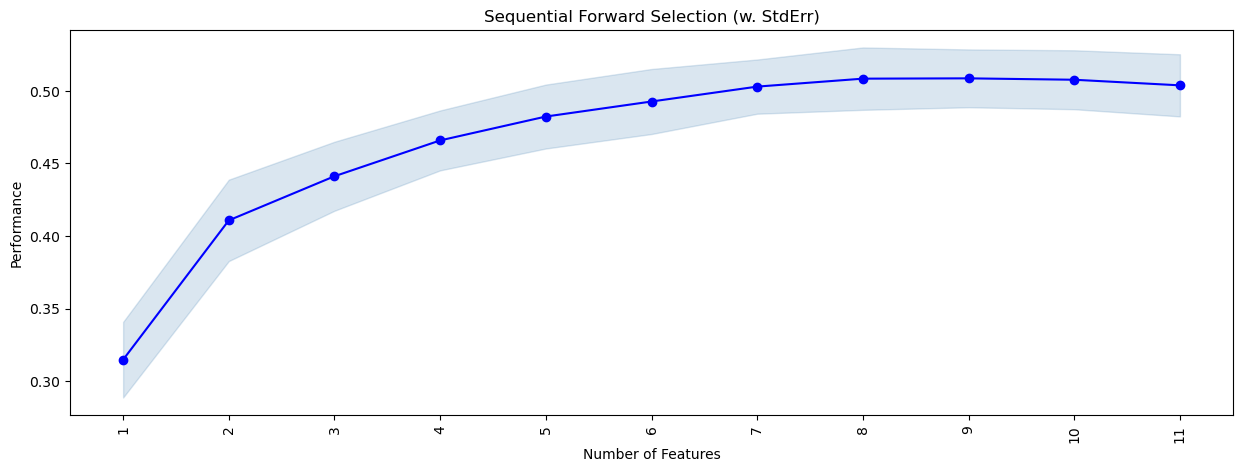

In [155]:
#to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

All features help

## Voting SVM, Gradient Boosting, and RF

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming df, X, and y are already defined (features and target)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(kernel='rbf', gamma='scale', random_state=42)
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create a voting ensemble classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('svm', svm_classifier),
        ('gbm', gbm_classifier)
    ],
    voting='hard'  # Use 'hard' voting for majority rule
)

# Train the voting classifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = voting_classifier.predict(X_train)
y_test_pred = voting_classifier.predict(X_test)


vote_accuracy_score = accuracy_score(y_test, y_test_pred)
vote_precision_score = precision_score(y_test, y_test_pred, average='weighted')
vote_recall_score = recall_score(y_test, y_test_pred, average='weighted')
vote_f1_score = f1_score(y_test, y_test_pred, average='weighted')


# Evaluate the model on the training set
print("Training Set Metrics:")
print("=====================")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("F1 Score:", f1_score(y_train, y_train_pred, average='weighted'))


# Evaluate the model on the test set
print("\nTest Set Metrics:")
print("=====================")
print("Accuracy:", vote_accuracy_score)
print("Precision:", vote_precision_score)
print("Recall:", vote_recall_score)
print("F1 Score:", vote_f1_score)


Training Set Metrics:
Accuracy: 0.9455040871934605
Precision: 0.9456070728868742
Recall: 0.9455040871934605
F1 Score: 0.9454419206675375

Test Set Metrics:
Accuracy: 0.8913043478260869
Precision: 0.8918861545719003
Recall: 0.8913043478260869
F1 Score: 0.8914883994867587


## Neural Network

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming df, X, and y are already defined (features and target)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLPClassifier (Neural Network) model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=10000, random_state=42)

# Train the MLPClassifier on the training data
mlp_classifier.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = mlp_classifier.predict(X_train)
y_test_pred = mlp_classifier.predict(X_test)

NN_accuracy_score = accuracy_score(y_test, y_test_pred)
NN_precision_score = precision_score(y_test, y_test_pred, average='weighted')
NN_recall_score = recall_score(y_test, y_test_pred, average='weighted')
NN_f1_score = f1_score(y_test, y_test_pred, average='weighted')


# Evaluate the model on the training set
print("Training Set Metrics:")
print("=====================")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("F1 Score:", f1_score(y_train, y_train_pred, average='weighted'))

# Evaluate the model on the test set
print("\nTest Set Metrics:")
print("=====================")
print("Accuracy:", NN_accuracy_score)
print("Precision:", NN_precision_score)
print("Recall:", NN_recall_score)
print("F1 Score:", NN_f1_score)

Training Set Metrics:
Accuracy: 0.94141689373297
Precision: 0.9438149098349448
Recall: 0.94141689373297
F1 Score: 0.9411055775680931

Test Set Metrics:
Accuracy: 0.8586956521739131
Precision: 0.8583526126844834
Recall: 0.8586956521739131
F1 Score: 0.8584202051021272


## SMOTE and SVM

In [162]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Assuming X and y are already defined from your DataFrame (df)
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train the SVM classifier on the resampled training data
svm_classifier = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on training and test sets
y_train_pred = svm_classifier.predict(X_train_resampled)
y_test_pred = svm_classifier.predict(X_test)

# Evaluate the model performance on training set
SVM_train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
SVM_train_precision = precision_score(y_train_resampled, y_train_pred, average='weighted')
SVM_train_recall = recall_score(y_train_resampled, y_train_pred, average='weighted')
SVM_train_f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')

print("Training Set Metrics:")
print("Accuracy:", SVM_train_accuracy)
print("Precision:", SVM_train_precision)
print("Recall:", SVM_train_recall)
print("F1 Score:", SVM_train_f1)

# Evaluate the model performance on test set
SVM_test_accuracy = accuracy_score(y_test, y_test_pred)
SVM_test_precision = precision_score(y_test, y_test_pred, average='weighted')
SVM_test_recall = recall_score(y_test, y_test_pred, average='weighted')
SVM_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nTest Set Metrics:")
print("Accuracy:", SVM_test_accuracy)
print("Precision:", SVM_test_precision)
print("Recall:", SVM_test_recall)
print("F1 Score:", SVM_test_f1)

Training Set Metrics:
Accuracy: 0.8728179551122195
Precision: 0.8755175545742114
Recall: 0.8728179551122195
F1 Score: 0.8725889653110048

Test Set Metrics:
Accuracy: 0.8695652173913043
Precision: 0.8762628994780961
Recall: 0.8695652173913043
F1 Score: 0.8703449566464974


## RF SMOTE

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Assuming X and y are already defined from your DataFrame (df)
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train the Random Forest classifier on the resampled training data
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on training and test sets
y_train_pred = rf_classifier.predict(X_train_resampled)
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model performance on training set
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred, average='weighted')
train_recall = recall_score(y_train_resampled, y_train_pred, average='weighted')
train_f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')

print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)

# Evaluate the model performance on test set
RFSmote_test_accuracy = accuracy_score(y_test, y_test_pred)
RFSmote_test_precision = precision_score(y_test, y_test_pred, average='weighted')
RFSmote_test_recall = recall_score(y_test, y_test_pred, average='weighted')
RFSmote_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nTest Set Metrics:")
print("Accuracy:", RFSmote_test_accuracy)
print("Precision:", RFSmote_test_precision)
print("Recall:", RFSmote_test_recall)
print("F1 Score:", RFSmote_test_f1)

Training Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set Metrics:
Accuracy: 0.8858695652173914
Precision: 0.8869042642140469
Recall: 0.8858695652173914
F1 Score: 0.8861486295823319


## Vizualization

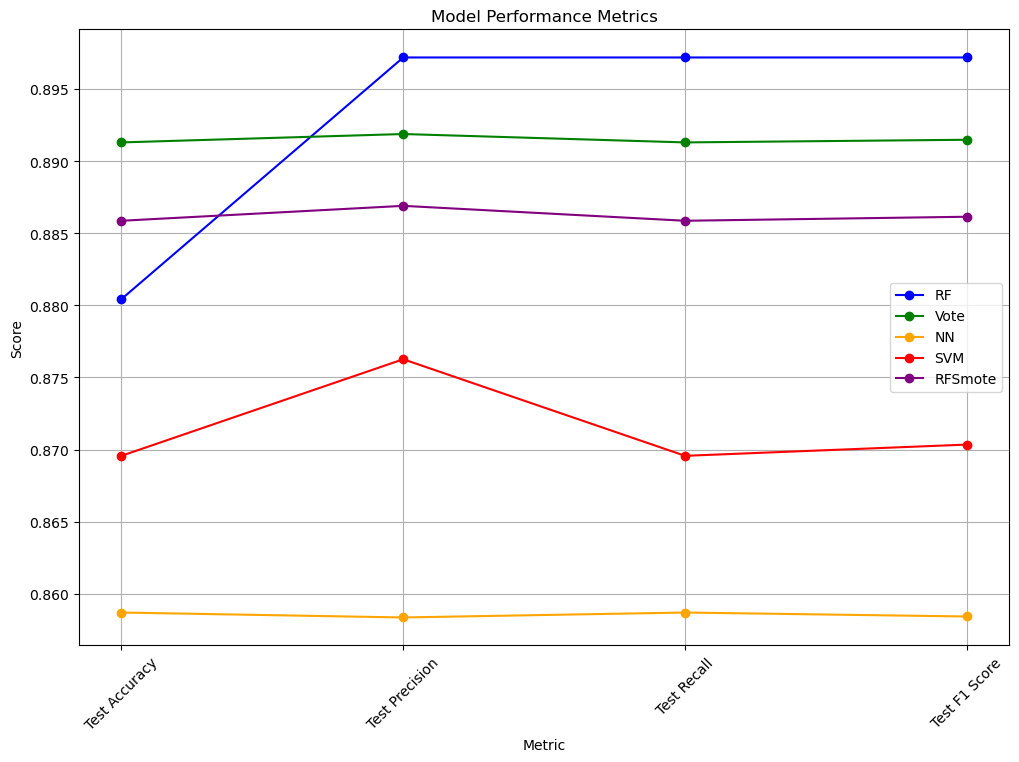

In [166]:
data = {
    'Model': ['RF', 'Vote', 'NN','SVM','RFSmote'],
    'Test Accuracy': [rf_accuracy_score, vote_accuracy_score, NN_accuracy_score,SVM_test_accuracy,RFSmote_test_accuracy],
    'Test Precision': [rf_precision_score, vote_precision_score, NN_precision_score,SVM_test_precision,RFSmote_test_precision],
    'Test Recall': [rf_recall_score, vote_recall_score,NN_recall_score, SVM_test_recall,RFSmote_test_recall ],
    'Test F1 Score': [rf_f1_score, vote_f1_score, NN_f1_score, SVM_test_f1, RFSmote_test_f1]
}

# Create a DataFrame
Vdf = pd.DataFrame(data)

# Set the 'Model' column as the index
Vdf.set_index('Model', inplace=True)

# Transpose the DataFrame for plotting
Vdf_transposed = Vdf.T

# Plotting the models against different metrics
plt.figure(figsize=(12, 8))

# Iterate through each model and plot its metrics
for model, color in zip(Vdf_transposed.columns, ['blue', 'green', 'orange','red','purple','yellow', 'black']):
    plt.plot(Vdf_transposed.index, Vdf_transposed[model], marker='o', linestyle='-', color=color, label=model)

plt.title('Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Summary/Observations

- Left all features that were not unique in the data set
- Attempted 5 different models including: RF, Voting model, Neural network, SVM, and RFSmote
- RF had a slightly less accuracy but higher precision, recall, and f1 score than the Voting model
- Voting was the most consistent but one could argue to use both RF or the voting
- Data set is likely too small to get much better results
- Possibly more features could be created to add information
- Went from 85% to roughly 90% through looking for more models
- Model reccomendation: RF or voting

In [171]:
df.to_csv(r'C:\Users\robso\Downloads\HeartModel.csv', index=False, header=True)
print(df)

          Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0    0.244898    1              1       0.70     0.479270          0   
1    0.428571    0              2       0.80     0.298507          0   
2    0.183673    1              1       0.65     0.469320          0   
3    0.408163    0              0       0.69     0.354892          0   
4    0.530612    1              2       0.75     0.323383          0   
..        ...  ...            ...        ...          ...        ...   
913  0.346939    1              3       0.55     0.437811          0   
914  0.816327    1              0       0.72     0.320066          1   
915  0.591837    1              0       0.65     0.217247          0   
916  0.591837    0              1       0.65     0.391376          0   
917  0.204082    1              2       0.69     0.290216          0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0             1  0.788732               0  0.295455      